# Visualization - Matplotlib

> *DS Python for GIS and Geoscience*  
> *September, 2023*
>
> *© 2023, Joris Van den Bossche and Stijn Van Hoey. Licensed under [CC BY 4.0 Creative Commons](http://creativecommons.org/licenses/by/4.0/)*

> *Adapted in 2024 for the course 'Computational Physics' by Wout Dewettinck*
---

# Matplotlib

[Matplotlib](http://matplotlib.org/) is a Python package used widely throughout the scientific Python community to produce high quality 2D publication graphics. It transparently supports a wide range of output formats including PNG (and other raster formats), PostScript/EPS, PDF and SVG and has interfaces for all of the major desktop GUI (graphical user interface) toolkits. It is a great package with lots of options.

However, matplotlib is...

> The 800-pound gorilla — and like most 800-pound gorillas, this one should probably be avoided unless you genuinely need its power, e.g., to make a **custom plot** or produce a **publication-ready** graphic.

> (As we’ll see, when it comes to statistical visualization, the preferred tack might be: “do as much as you easily can in your convenience layer of choice [nvdr e.g. directly from xarray], and then use matplotlib for the rest.”)

(quote used from [this](https://dansaber.wordpress.com/2016/10/02/a-dramatic-tour-through-pythons-data-visualization-landscape-including-ggplot-and-altair/) blogpost)

And that's we mostly did, just use the `.plot` function of xarray. So, why do we learn matplotlib? Well, for the *...then use matplotlib for the rest.*; at some point, somehow!

Matplotlib comes with a convenience sub-package called ``pyplot`` which, for consistency with the wider matplotlib community, should always be imported as ``plt``:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## - dry stuff - The matplotlib `Figure`, `Axes` and `Axis`

At the heart of **every** plot is the figure object. The "Figure" object is the top level concept which can be drawn to one of the many output formats, or simply just to screen. Any object which can be drawn in this way is known as an "Artist" in matplotlib.

Lets create our first artist using pyplot, and then show it:

In [2]:
fig = plt.figure()
plt.show()

<Figure size 640x480 with 0 Axes>

On its own, drawing the figure artist is uninteresting and will result in an empty piece of paper (that's why we didn't see anything above).

By far the most useful artist in matplotlib is the **Axes** artist. The Axes artist represents the "data space" of a typical plot, a rectangular axes (the most common, but not always the case, e.g. polar plots) will have 2 (confusingly named) **Axis** artists with tick labels and tick marks.

![](../img/matplotlib_fundamentals.png)

There is no limit on the number of Axes artists which can exist on a Figure artist. Let's go ahead and create a figure with a single Axes artist, and show it using pyplot:

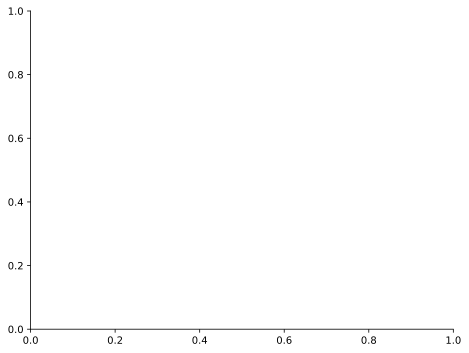

In [3]:
ax = plt.axes()

Matplotlib's ``pyplot`` module makes the process of creating graphics easier by allowing us to skip some of the tedious Artist construction. For example, we did not need to manually create the Figure artist with ``plt.figure`` because it was implicit that we needed a figure when we created the Axes artist.

Under the hood matplotlib still had to create a Figure artist, its just we didn't need to capture it into a variable.

## - essential stuff - `pyplot` versus Object based

Some example data:

In [4]:
x = np.linspace(0, 5, 10)
y = x ** 2

Observe the following difference:

**1. pyplot style: plt...** (you will see this a lot for code online!)

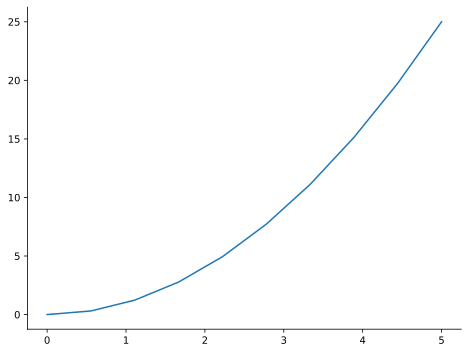

In [5]:
ax = plt.plot(x, y, '-')

**2. creating objects**

In [6]:
from matplotlib import ticker

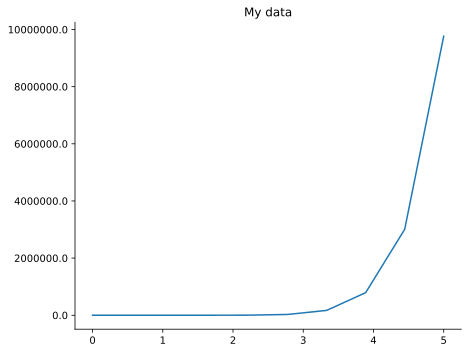

In [7]:
x = np.linspace(0, 5, 10)
y = x ** 10

fig, ax = plt.subplots()
ax.plot(x, y, '-')
ax.set_title("My data")

ax.yaxis.set_major_formatter(ticker.FormatStrFormatter("%.1f"))

Although a little bit more code is involved, the advantage is that we now have **full control** of where the plot axes are placed, and we can easily add more than one axis to the figure:

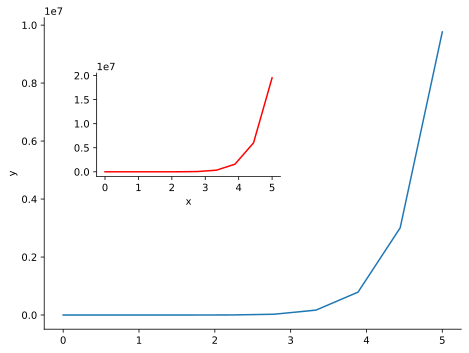

In [8]:
fig, ax1 = plt.subplots()
ax1.plot(x, y, '-')
ax1.set_ylabel('y')

ax2 = fig.add_axes([0.2, 0.5, 0.4, 0.3]) # inset axes
ax2.set_xlabel('x')
ax2.plot(x, y*2, 'r-')

**REMEMBER**:

 <ul>
  <li>Use the <b>object oriented</b> power of Matplotlib!</li>
  <li>Get yourself used to writing <code>fig, ax = plt.subplots()</code></li>
</ul>

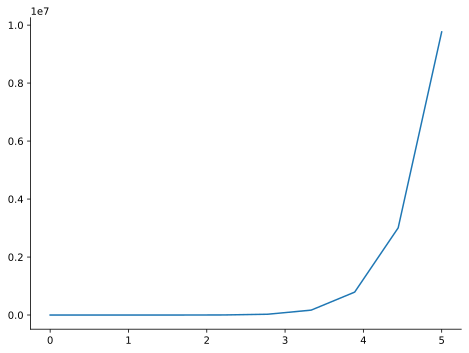

In [9]:
fig, ax = plt.subplots()
ax.plot(x, y, '-')

## An small cheat-sheet reference for some common elements

/tmp/ipykernel_4023897/1015421915.py:6: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  fig.subplots_adjust(top=0.8)


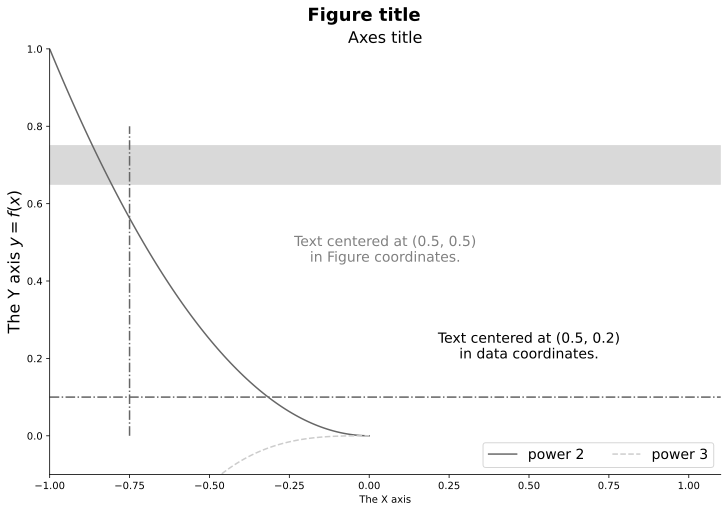

In [10]:
x = np.linspace(-1, 0, 100)

fig, ax  = plt.subplots(figsize=(10, 7))

# Adjust the created axes so that its topmost extent is 0.8 of the figure.
fig.subplots_adjust(top=0.8)

ax.plot(x, x**2, color='0.4', label='power 2')
ax.plot(x, x**3, color='0.8', linestyle='--', label='power 3')

ax.vlines(x=-0.75, ymin=0., ymax=0.8, color='0.4', linestyle='-.') 
ax.axhline(y=0.1, color='0.4', linestyle='-.')
ax.fill_between(x=[-1, 1.1], y1=[0.65], y2=[0.75], color='0.85')

fig.suptitle('Figure title', fontsize=18, 
             fontweight='bold')
ax.set_title('Axes title', fontsize=16)

ax.set_xlabel('The X axis')
ax.set_ylabel('The Y axis $y=f(x)$', fontsize=16)

ax.set_xlim(-1.0, 1.1)
ax.set_ylim(-0.1, 1.)

ax.text(0.5, 0.2, 'Text centered at (0.5, 0.2)\nin data coordinates.',
        horizontalalignment='center', fontsize=14)

ax.text(0.5, 0.5, 'Text centered at (0.5, 0.5)\nin Figure coordinates.',
        horizontalalignment='center', fontsize=14, 
        transform=ax.transAxes, color='grey')

ax.legend(loc='lower right', frameon=True, ncol=2, fontsize=14)

Adjusting specific parts of a plot is a matter of accessing the correct element of the plot:

![](https://matplotlib.org/stable/_images/anatomy.png)

For more information on legend positioning, check [this post](http://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-the-plot) on stackoverflow!

## I do not like the style...

**...understandable**

Matplotlib had a bad reputation in terms of its default styling as figures created with earlier versions of Matplotlib were very Matlab-lookalike and mostly not really catchy. 

Since Matplotlib 2.0, this has changed: https://matplotlib.org/users/dflt_style_changes.html!

However...
> *Des goûts et des couleurs, on ne discute pas...*

(check [this link](https://fr.wiktionary.org/wiki/des_go%C3%BBts_et_des_couleurs,_on_ne_discute_pas) if you're not french-speaking)

To account different tastes, Matplotlib provides a number of styles that can be used to quickly change a number of settings:

In [11]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

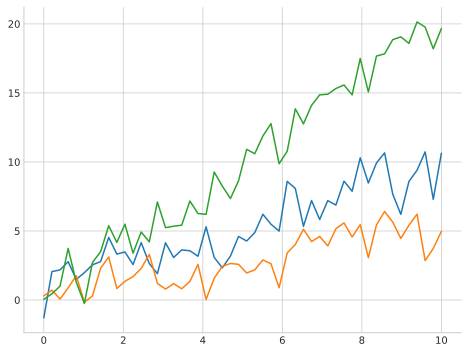

In [12]:
x = np.linspace(0, 10)

with plt.style.context('seaborn-v0_8-whitegrid'):  # 'seaborn', ggplot', 'bmh', 'grayscale', 'seaborn-whitegrid', 'seaborn-muted'
    fig, ax = plt.subplots()
    ax.plot(x, np.sin(x) + x + np.random.randn(50))
    ax.plot(x, np.sin(x) + 0.5 * x + np.random.randn(50))
    ax.plot(x, np.sin(x) + 2 * x + np.random.randn(50))

We should not start discussing about colors and styles, just pick **your favorite style**!

In [13]:
plt.style.use('seaborn-v0_8-whitegrid')

or go all the way and define your own custom style, see the [official documentation](https://matplotlib.org/3.1.1/tutorials/introductory/customizing.html) or [this tutorial](https://colcarroll.github.io/yourplotlib/#/).

<b>REMEMBER</b>:

 <ul>
  <li>If you just want <b>quickly a good-looking plot</b>, use one of the available styles (<code>plt.style.use('...')</code>)</li>
  <li>Otherwise, the object-oriented way of working makes it possible to change everything!</li>
</ul>

# Need more matplotlib inspiration?

For more in-depth material:
* http://www.labri.fr/perso/nrougier/teaching/matplotlib/
* notebooks in matplotlib section: http://nbviewer.jupyter.org/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/Index.ipynb#4.-Visualization-with-Matplotlib
* main reference: [matplotlib homepage](http://matplotlib.org/)

**Galleries!**

Galleries are great to get inspiration, see the plot you want, and check the code how it is created:
    
* [matplotlib gallery](http://matplotlib.org/gallery.html) is an important resource to start from
* [seaborn gallery](https://seaborn.pydata.org/examples/index.html)
* The Python Graph Gallery (https://python-graph-gallery.com/)